In [1]:
import bccr
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


isi = bccr.SW(isi=25725)
res = ARIMA(isi, order=[3,0,0]).fit()

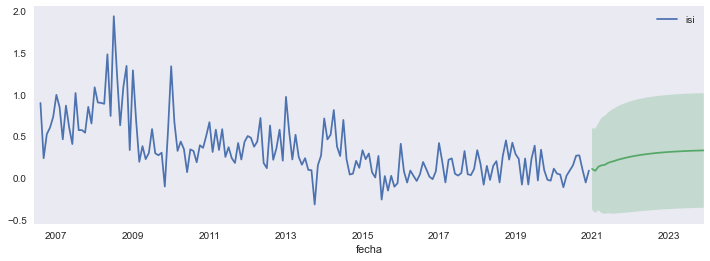

In [2]:
from scipy.stats import norm

plt.style.use('seaborn-dark')
horizon = 36
fcast =res.get_forecast(steps=horizon, alpha=0.05)


fig, ax =plt.subplots(figsize=[12,4])
isi.plot(ax=ax)
fcast.predicted_mean.plot(ax=ax)
ax.axhline(isi.values.mean(), color='C2')


ax.fill_between(fcast.row_labels, *fcast.conf_int().values.T,
                facecolor='C1', alpha=0.25, interpolate=True);

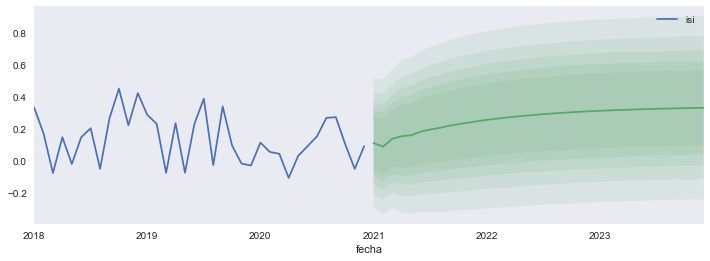

In [3]:
fig, ax =plt.subplots(figsize=[12,4])
isi['2018':].plot(ax=ax)
fcast.predicted_mean.plot(ax=ax)
ax.axhline(isi.values.mean(), color='C2')

for alpha in np.arange(1,6)/10:
    ax.fill_between(fcast.row_labels, *fcast.conf_int(alpha=alpha).values.T,
                facecolor='C1', alpha=0.1, interpolate=True);